# Omni Recognition with Qwen3-VL (Together AI)
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/togethercomputer/together-cookbook/blob/main/Multimodal/Vision/Omni_Recognition.ipynb)


## Introduction

In this notebook, we'll explore Qwen3-VL's "recognize anything" capabilities using Together AI's API. The model can recognize:

- Celebrities and public figures
- Anime characters
- Food items (with multilingual names)
- Landmarks and locations
- And much more!

We'll also explore object spotting with bounding boxes.


### Install required libraries


In [ ]:
!pip install openai pillow


In [1]:
import os
import base64
import openai
from PIL import Image
from IPython.display import display

# Together AI Configuration
client = openai.OpenAI(
    api_key=os.environ.get("TOGETHER_API_KEY"),
    base_url="https://api.together.xyz/v1",
)

MODEL_ID = "Qwen/Qwen3-VL-32B-Instruct"

print(f"Using model: {MODEL_ID}")
print(f"API Key configured: {bool(os.environ.get('TOGETHER_API_KEY'))}")


Using model: Qwen/Qwen3-VL-32B-Instruct
API Key configured: True


In [2]:
def encode_image(image_path):
    with open(image_path, "rb") as f:
        return base64.b64encode(f.read()).decode("utf-8")

def get_mime_type(image_path):
    ext = image_path.split(".")[-1].lower()
    return "jpeg" if ext in ["jpg", "jpeg"] else ext

def inference_with_api(image_path, prompt, max_tokens=4096):
    base64_image = encode_image(image_path)
    mime_type = get_mime_type(image_path)
    
    response = client.chat.completions.create(
        model=MODEL_ID,
        messages=[{
            "role": "user",
            "content": [
                {"type": "image_url", "image_url": {"url": f"data:image/{mime_type};base64,{base64_image}"}},
                {"type": "text", "text": prompt},
            ],
        }],
        max_tokens=max_tokens,
    )
    return response.choices[0].message.content


## 1. Object Recognition

Identify objects, people, or characters in images.


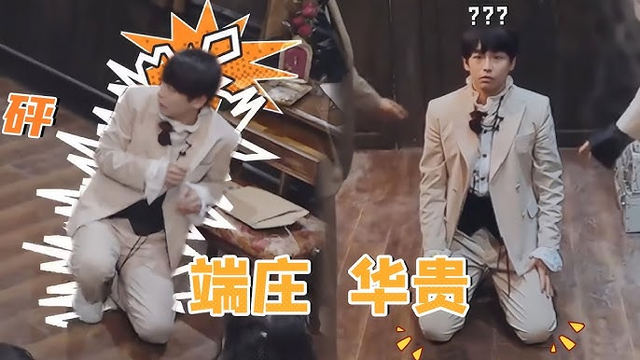

The person in the image is **Zhang Yixing** (also known as **Lay Zhang**), a Chinese singer, actor, and dancer, best known as a member of the South Korean-Chinese boy band **EXO**.

In this image, he is seen in a light beige suit, kneeling on the floor, likely during a performance, game, or variety show segment. The image appears to be from a Chinese variety show or entertainment program — possibly *Keep Running* or a similar show — given the playful and exaggerated graphics like "砰" (bang), "端庄 华贵" (dignified and elegant), and "???" which are commonly used in such shows for comedic or dramatic effect.

The left panel shows him in a dynamic, slightly awkward pose with an explosion graphic, while the right panel shows him in a more composed, “dignified” pose — the contrast is likely for humorous effect.

Zhang Yixing is known for his charisma, dance skills, and frequent appearances on Chinese variety shows, which often feature such exaggerated visual effects and text overlays.


In [3]:
# Example: Celebrity recognition
image_path = "../assets/omni_recognition/sample-celebrity-2.jpg"
prompt = "Who is this?"

image = Image.open(image_path)
image.thumbnail([640, 640], Image.Resampling.LANCZOS)
display(image)

response = inference_with_api(image_path, prompt)
print(response)


## 2. Object Spotting

Identify multiple objects and return their bounding boxes and names.

**Note:** Coordinates use relative scale from 0 to 1000.


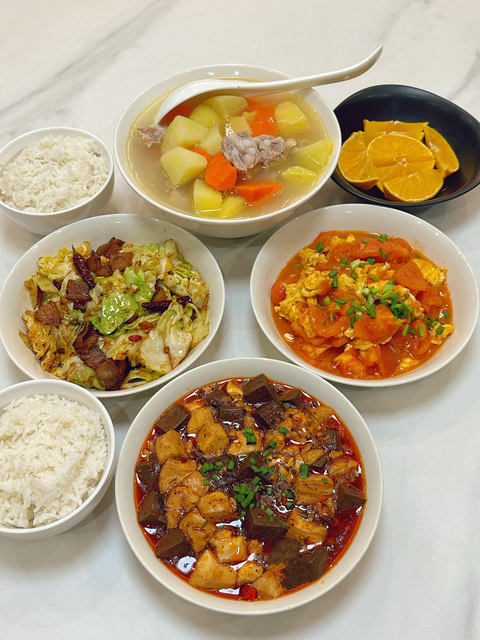

```json
[
  {
    "bbox_2d": [0, 209, 231, 337],
    "name_chinese": "白米饭",
    "name_english": "Steamed Rice"
  },
  {
    "bbox_2d": [0, 587, 235, 842],
    "name_chinese": "白米饭",
    "name_english": "Steamed Rice"
  },
  {
    "bbox_2d": [241, 100, 718, 370],
    "name_chinese": "土豆胡萝卜排骨汤",
    "name_english": "Pork Rib Soup with Potatoes and Carrots"
  },
  {
    "bbox_2d": [685, 132, 999, 329],
    "name_chinese": "橙子片",
    "name_english": "Orange Slices"
  },
  {
    "bbox_2d": [0, 335, 470, 617],
    "name_chinese": "干煸包菜炒肉",
    "name_english": "Stir-fried Cabbage with Pork and Dried Chili"
  },
  {
    "bbox_2d": [514, 319, 999, 599],
    "name_chinese": "番茄炒蛋",
    "name_english": "Tomato and Egg Stir-fry"
  },
  {
    "bbox_2d": [238, 555, 794, 956],
    "name_chinese": "麻辣豆腐鸭血",
    "name_english": "Spicy Tofu with Duck Blood"
  }
]
```


In [4]:
# Example: Food spotting with multilingual names
image_path = "../assets/omni_recognition/sample-food.jpeg"
prompt = "Identify all food items in the image and return their bounding box and Chinese and English name in JSON format."

image = Image.open(image_path)
image.thumbnail([640, 640], Image.Resampling.LANCZOS)
display(image)

response = inference_with_api(image_path, prompt)
print(response)


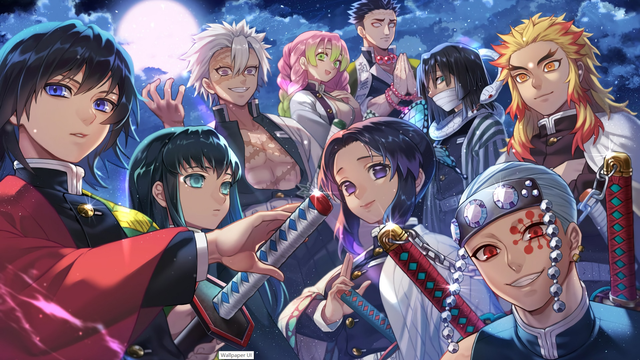

```json
[
  {
    "bbox_2d": [0, 55, 469, 999],
    "name_chinese": "富冈义勇",
    "name_english": "Yoriichi Tsugikuni"
  },
  {
    "bbox_2d": [196, 349, 455, 999],
    "name_chinese": "时透无一郎",
    "name_english": "Muichiro Tokito"
  },
  {
    "bbox_2d": [219, 54, 506, 606],
    "name_chinese": "不死川实弥",
    "name_english": "Sanemi Shinazugawa"
  },
  {
    "bbox_2d": [430, 82, 566, 489],
    "name_chinese": "甘露寺蜜璃",
    "name_english": "Mitsuri Kanroji"
  },
  {
    "bbox_2d": [535, 0, 660, 338],
    "name_chinese": "悲鸣屿行冥",
    "name_english": "Gyomei Himejima"
  },
  {
    "bbox_2d": [646, 115, 798, 655],
    "name_chinese": "蛇柱",
    "name_english": "Obanai Iguro"
  },
  {
    "bbox_2d": [759, 30, 999, 750],
    "name_chinese": "炼狱杏寿郎",
    "name_english": "Kyojuro Rengoku"
  },
  {
    "bbox_2d": [430, 324, 794, 999],
    "name_chinese": "宇髄天元",
    "name_english": "Tengen Uzui"
  },
  {
    "bbox_2d": [683, 447, 999, 999],
    "name_chinese": "不死川玄弥",
    "name_english": "Genya Shi

In [5]:
# Example: Anime character recognition
image_path = "../assets/omni_recognition/sample-anime.jpeg"
prompt = "Who are the anime characters in the image? Please show the bounding boxes of all characters and their names in Chinese and English in JSON format."

image = Image.open(image_path)
image.thumbnail([640, 640], Image.Resampling.LANCZOS)
display(image)

response = inference_with_api(image_path, prompt)
print(response)
